In [28]:
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import ClusterCentroids
%matplotlib inline

In [29]:
X_train = joblib.load('tmp/X_train.pkl')
X_test = joblib.load('tmp/X_test.pkl')

y_train = joblib.load('tmp/y_train.pkl')
y_test = joblib.load('tmp/y_test.pkl')

In [37]:
y_test.size

294151

In [30]:
# Random tree clasification

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

#rus = RandomUnderSampler(random_state=0)
#X_resampled, y_resampled = rus.fit_sample(X_train, y_train)
#print(sorted(Counter(y_train).items()))
#cc = ClusterCentroids()
#X_resampled, y_resampled = cc.fit_sample(X_train, y_train)
#print(sorted(Counter(y_resampled).items()))

In [31]:
clf = RandomForestClassifier(n_jobs=1, random_state=0, n_estimators=20, max_features="sqrt", criterion="entropy")
clf.fit(X_train[:500000], y_train[:500000])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Confusion matrix:
 [[ 40446   6855  36903]
 [ 11105  17973  21485]
 [ 31580  12005 115799]]


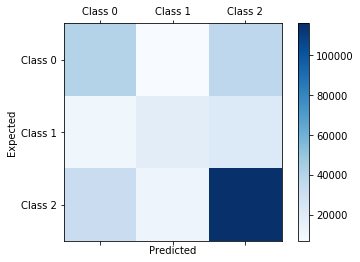

In [32]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
y_pred = clf.predict(X_test)

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
#print(y_pred)

In [33]:
#Accurancy
scores = clf.score(X_test,y_test);
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.59 (+/- 0.00)


In [34]:
# :500000 Accurancy 0.22 criterion entropy
# :200000 Accurancy 0.58 criterion gini s prekatogirizaciou
# :500000 Accurancy 0.59 criterion gini s prekatogirizaciou